In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160222_NO_fixI0"

input = "../DOAS/#{prefix}.csv"

input_sum = "../DOAS/#{prefix}_sum.csv"

img_cal = "../images/#{prefix}.png"

flow_air = 3.0
flow_no_offset = 0.004
c_no = 8.177e3

nil

# Data Preparation

In [3]:
d = DataFrame.from_csv(input)
d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})
d.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.015739405556914,0.0504602906357406,3077804.53416667,653807.108896056,18,0.0242539004612533,0.0456719657926022,1914.05673677838,815.913669063013,2016-02-22T15:07:45+00:00
1,-0.0673853449318047,0.0758413308664359,-710786.080932373,719851.611034635,23,0.00291389776773915,0.0501995225157307,1530.36732388467,892.468370701805,2016-02-22T15:10:21+00:00
2,-0.0342124229306316,0.0696620520692498,-511340.10715876,658507.808029201,31,0.0115827677543049,0.0459163082051637,1491.86941441076,816.367676362713,2016-02-22T15:14:33+00:00
3,-0.08067678618079,0.0897629869494408,-3426122.69702754,915323.600600611,43,8.4809619131759,0.0646334443246023,2042.06429957387,1136.24145607746,2016-02-22T15:20:47+00:00
4,-0.161090550267928,0.107285612719877,-3801875.53158565,1094210.35274481,44,10.8077738355612,0.0775250298636747,1568.24263908566,1358.22603570573,2016-02-22T15:21:18+00:00
5,-0.106527788567054,0.127407834214285,-3133680.02467665,1299307.93345084,45,13.9253426397434,0.0924804584415288,1684.44208948899,1612.63398002789,2016-02-22T15:21:49+00:00
6,-0.237022583356828,0.142180395369321,-2982983.61896192,1449812.65552731,46,16.5081740856036,0.103594992222444,1986.84645205727,1799.28590558431,2016-02-22T15:22:20+00:00
7,-0.229421785654533,0.157752671435629,-2863523.77210586,1608449.52406793,47,17.887221300794,0.115172508407523,1455.75484339332,1996.05455093822,2016-02-22T15:22:51+00:00
8,-0.247567682590006,0.158245772462575,-3248308.71053345,1614361.83658498,48,18.7381444936473,0.115747679091741,1735.75075273887,2003.34517109473,2016-02-22T15:23:22+00:00
9,-0.309678935539275,0.165320976531688,-3594019.06235668,1685159.30221137,49,19.2140601990927,0.12091207688138,1626.70726277453,2091.13137215723,2016-02-22T15:23:53+00:00


# Plot

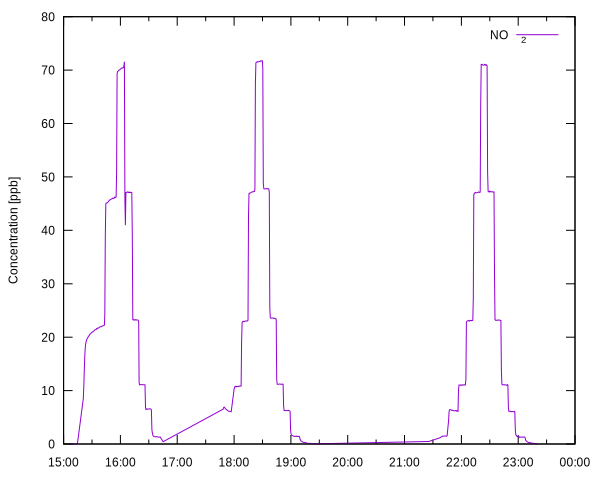

In [4]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:no2], with: "lines", title: "NO_2"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

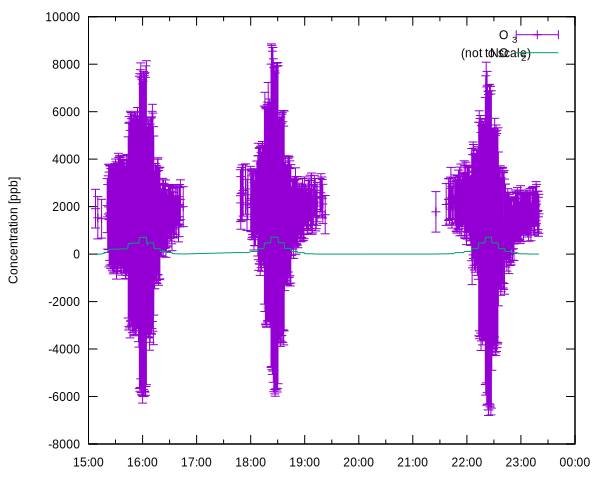

In [13]:
d.index = DateTimeIndex.new(d[:timestamp])

Plot.new(
  [d[:o3, :o3_err], wit: "yerrorbars", title:"O_3"],
  [d[:no2]*10, with: "lines", title: "NO_2 (not to scale)"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

# Compute Averages

In [6]:
summary = DataFrame.from_csv(input_sum)
summary.vectors = Index.new(summary.vectors.to_a.map{|i| i.to_sym})
summary.head

,flow,length,start,stop
0,0.1,5,70,80
1,0.2,5,94,110
2,0.3,5,115,125
3,0.2,5,131,141
4,0.1,5,145,155
5,0.05,5,158,168
6,0.03,5,171,181
7,0.01,5,189,199
8,0.01,10,262,272
9,0.03,10,285,295


In [7]:
summary[:no_comp] = summary.collect_rows do |row|
  c_no*(row[:flow] - flow_no_offset)*0.1/((row[:flow]-flow_no_offset)*0.1 + flow_air)
end
summary

,flow,length,start,stop,no_comp
0,0.1,5,70,80,26.0829346092504
1,0.2,5,94,110,53.076301496887005
2,0.3,5,115,125,79.89147082123053
3,0.2,5,131,141,53.076301496887005
4,0.1,5,145,155,26.0829346092504
5,0.05,5,158,168,12.518871064367971
6,0.03,5,171,181,7.0805968160927195
7,0.01,5,189,199,1.6350729854029196
8,0.01,10,262,272,1.6350729854029196
9,0.03,10,285,295,7.0805968160927195


In [8]:
d.index = Index.new(d[:index].to_a)

summary[:no] = Array.new(summary.nrows)
summary[:no_err] = Array.new(summary.nrows)

summary.recode_rows do |row|
  
  pointer = d[:index].map do |i|
    ret = false
    
    if i >= row[:start] and i <= row[:stop]
      ret = true
    end
    ret
  end
  
  subset = d.where(pointer)
  
  if subset.nrows == 0
    row[:no] = nil
    row[:no_err] = nil
  else
    row[:no] = subset[:no2].mean
    row[:no_err] = subset[:no2].std/Math::sqrt(subset.nrows.to_f)
  end
  
  row
end

,flow,length,start,stop,no_comp,no,no_err
0,0.1,5,70,80,26.0829346092504,21.784942644662973,0.046124501680701535
1,0.2,5,94,110,53.076301496887005,45.88330098552343,0.061795813811417175
2,0.3,5,115,125,79.89147082123053,70.23336673287609,0.06010944051159138
3,0.2,5,131,141,53.076301496887005,47.119746246131875,0.012134063542475395
4,0.1,5,145,155,26.0829346092504,23.22904511381011,0.014299614002408229
5,0.05,5,158,168,12.518871064367971,11.101630826887982,0.005896961626837256
6,0.03,5,171,181,7.0805968160927195,6.542186062276812,0.012248462732981304
7,0.01,5,189,199,1.6350729854029196,1.328101283978134,0.011500907950381872
8,0.01,10,262,272,1.6350729854029196,,
9,0.03,10,285,295,7.0805968160927195,6.087352456294007,0.028449232011387337


In [9]:
plot = Plot.new(
  [summary[:no_comp, :no, :no_err], using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Concentration, computed [ppb]",
  ylabel: "Concentration, DOAS [ppb]"
  )
nil

In [10]:
fit = fit_poly(summary[:no_comp, :no, :no_err], degree: 1, using: "2:3:4")
fit[:formula_ds].data

" -0.0844276*x**0 + 0.894501*x**1 "

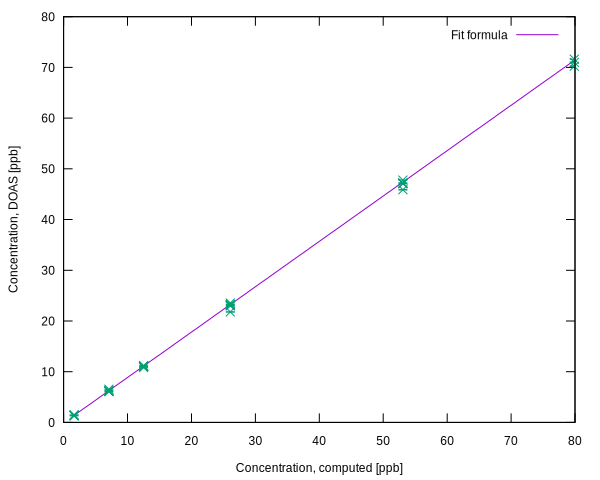

In [11]:
(plot << fit[:formula_ds]).to_png(img_cal)

# Length dependence

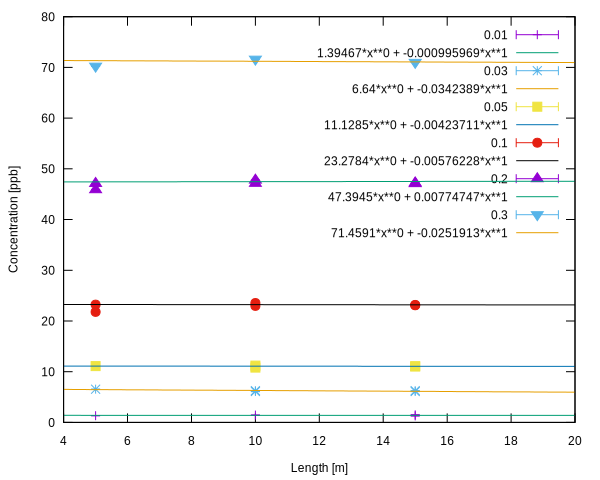

In [12]:
tmp = []

[0.01, 0.03, 0.05, 0.1, 0.2, 0.3].each do |flow|
  tmp << [ summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", 
    with: "yerrorbars", title: "#{flow}"]
  fit = fit_poly(summary.where(summary[:flow].eq(flow))[:length, :no, :no_err], using: "2:3:4", degree: 1)
  fit[:formula_ds].title = fit[:formula_ds].data
  tmp << fit[:formula_ds]
end

#summary.where(summary[:flow].eq(0.1))
plot = Plot.new(*tmp,
  xlabel: "Length [m]",
  ylabel: "Concentration [ppb]",
  xrange: 4..20)